In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image

In [3]:
!unzip "/content/drive/MyDrive/ds_301_final_project/hurricane.zip"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: hurricane/train/damage/-95.638343_29.841283.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.638343_29.841283.jpeg  
  inflating: hurricane/train/damage/-95.08795699999999_29.846401.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.08795699999999_29.846401.jpeg  
  inflating: hurricane/train/damage/-95.15535899999999_30.021469.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.15535899999999_30.021469.jpeg  
  inflating: hurricane/train/damage/-95.53323_29.747687.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.53323_29.747687.jpeg  
  inflating: hurricane/train/damage/-95.096357_29.807941999999997.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.096357_29.807941999999997.jpeg  
  inflating: hurricane/train/damage/-95.63247199999999_29.844943.jpeg  
  inflating: __MACOSX/hurricane/train/damage/._-95.63247199999999_29.844943.jpeg  
  inflating: hurricane/train/damage/-93.793368_30.040631.jpeg  
  inflating

In [4]:
datasetPath='/content/hurricane'
os.listdir(datasetPath)

['.DS_Store', 'valid', 'test', 'train']

In [5]:
trainDir=datasetPath+"/"+"train/"

validDir=datasetPath+"/"+"valid/"

testDir=datasetPath+"/"+"test/"

In [6]:
def load_images(path,x,y):
    imgs = []
    label = []
    l1 = os.listdir(path)
    c=0
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:

            img = Image.open(path+i+'/'+j).convert('RGB')
            img = img.resize(size=(x,y))
#             img = img.convert('L')
            imgs.append(np.array(img))
            label.append(i)
            del img
    return np.array(imgs),label

In [7]:
x_train,y_train  = x_train,y_train=load_images(trainDir,224,224)
x_valid,y_valid  = x_valid,y_valid=load_images(validDir,224,224)
x_test,y_test  = x_test,y_test=load_images(testDir,224,224)

from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_valid, y_valid = shuffle(x_valid, y_valid, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

In [8]:
t_train = pd.Series(y_train,dtype='category')
t_train = t_train.cat.codes
t_valid = pd.Series(y_valid,dtype='category')
t_valid = t_valid.cat.codes
t_test = pd.Series(y_test,dtype='category')
t_test = t_test.cat.codes

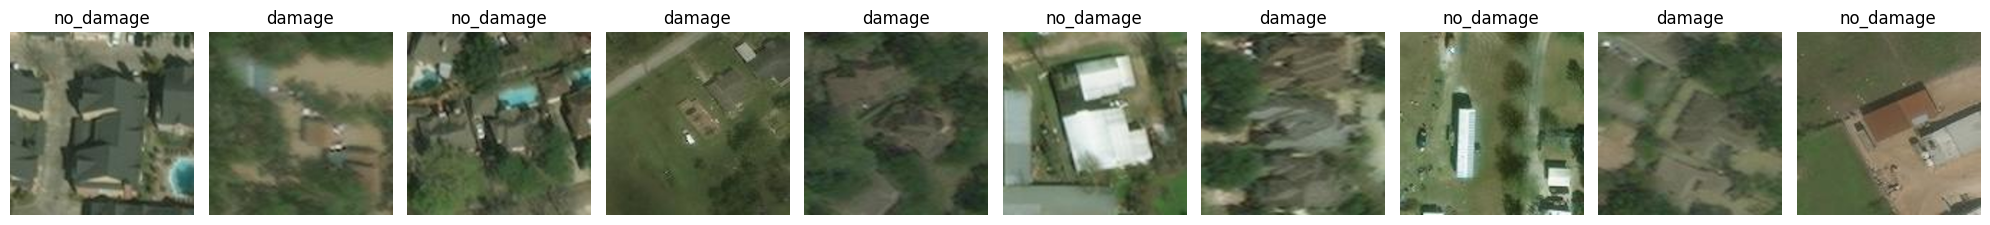

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

def display_random_samples(images, labels, num_samples=5):

    if num_samples > len(images):
        print("Number of samples requested exceeds the total number of images. Displaying all images instead.")
        num_samples = len(images)

    # Randomly select images and their corresponding labels
    random_indices = random.sample(range(len(images)), num_samples)
    selected_images = [images[i] for i in random_indices]
    selected_labels = [labels[i] for i in random_indices]

    # Set up the subplot grid
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 2, 4))

    if num_samples == 1:  # If only one sample, axes is not a list
        axes = [axes]

    for ax, img, label in zip(axes, selected_images, selected_labels):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `imgs` and `label` are obtained from the `load_images` function
display_random_samples(x_train, y_train, num_samples=10)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

modelVGG16 = Sequential()

# First block
modelVGG16.add(Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(64, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second block
modelVGG16.add(Conv2D(128, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(128, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third block
modelVGG16.add(Conv2D(256, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(256, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(256, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fourth block
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fifth block
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Conv2D(512, (3, 3), padding='same'))
modelVGG16.add(Activation('relu'))
modelVGG16.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
modelVGG16.add(Flatten())
modelVGG16.add(Dense(4096))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Dropout(0.5))

modelVGG16.add(Dense(4096))
modelVGG16.add(Activation('relu'))
modelVGG16.add(Dropout(0.5))

# Output Layer
modelVGG16.add(Dense(2))  # Adjust the number of units according to your problem
modelVGG16.add(Activation('softmax'))


In [11]:
modelVGG16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                        

In [12]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

modelVGG16.compile(loss="sparse_categorical_crossentropy", optimizer= 'sgd', metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('best_model_VGG16.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
historyVGG16 = modelVGG16.fit(x_train,t_train,epochs=20,validation_data=(x_valid,t_valid),callbacks=[mc])

Epoch 1/20
342/342 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.5855
Epoch 1: val_accuracy improved from -inf to 0.51150, saving model to best_model_VGG16.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


342/342 [==============================] - 62s 150ms/step - loss: 0.6764 - accuracy: 0.5855 - val_loss: 0.6469 - val_accuracy: 0.5115
Epoch 2/20
342/342 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.7445
Epoch 2: val_accuracy improved from 0.51150 to 0.84550, saving model to best_model_VGG16.h5
342/342 [==============================] - 47s 139ms/step - loss: 0.5371 - accuracy: 0.7445 - val_loss: 0.4028 - val_accuracy: 0.8455
Epoch 3/20
342/342 [==============================] - ETA: 0s - loss: 0.3425 - accuracy: 0.8604
Epoch 3: val_accuracy improved from 0.84550 to 0.88100, saving model to best_model_VGG16.h5
342/342 [==============================] - 47s 139ms/step - loss: 0.3425 - accuracy: 0.8604 - val_loss: 0.2836 - val_accuracy: 0.8810
Epoch 4/20
342/342 [==============================] - ETA: 0s - loss: 0.2970 - accuracy: 0.8736
Epoch 4: val_accuracy improved from 0.88100 to 0.90100, saving model to best_model_VGG16.h5
342/342 [=========================

In [13]:
import re

def extract_lat_long(file_name):
    match = re.search(r'([-+]?[0-9]*\.?[0-9]+)_([-+]?[0-9]*\.?[0-9]+)\.jpeg', file_name)
    if match:
        return float(match.group(1)), float(match.group(2))
    else:
        return None, None

def load_images_with_coordinates(path, x, y):
    imgs = []
    labels = []
    latitudes = []
    longitudes = []

    for label_dir in os.listdir(path):
        label_path = os.path.join(path, label_dir)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                if img_file.endswith('.jpeg'):
                    # Extract latitude and longitude
                    lat, long = extract_lat_long(img_file)

                    # Load the image
                    img_path = os.path.join(label_path, img_file)
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize((x, y))
                    imgs.append(np.array(img))

                    # Append label and coordinates
                    labels.append(label_dir)
                    latitudes.append(lat)
                    longitudes.append(long)

                    del img

    return np.array(imgs), labels, latitudes, longitudes

In [14]:
x_test,y_test,lat_test,long_test =load_images_with_coordinates(testDir,224,224)

x_test, y_test = shuffle(x_test, y_test, random_state=0)

t_test = pd.Series(y_test,dtype='category')
print(dict(enumerate(t_test.cat.categories)))
t_test = t_test.cat.codes

{0: 'damage', 1: 'no_damage'}


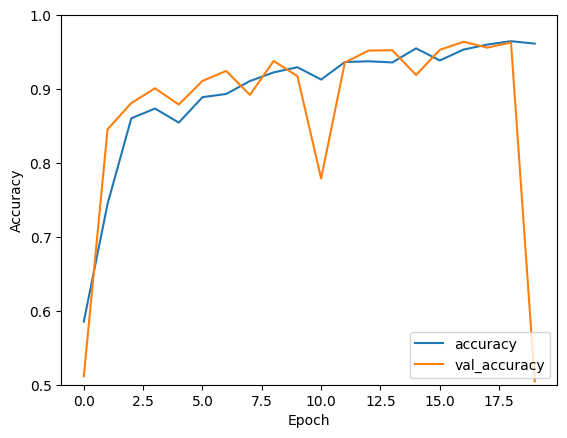

In [15]:
plt.plot(historyVGG16.history['accuracy'], label='accuracy')
plt.plot(historyVGG16.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
from keras.models import load_model

saved_model_VGG16 = load_model('best_model_VGG16.h5')
test_loss, test_acc = saved_model_VGG16.evaluate(x_test,t_test, verbose=2)
test_loss, test_acc

282/282 - 11s - loss: 0.1201 - accuracy: 0.9573 - 11s/epoch - 39ms/step


(0.12012786418199539, 0.9573333263397217)

In [17]:
y_pred = saved_model_VGG16.predict(x_test)

282/282 [==============================] - 10s 35ms/step


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score

# Convert predictions to binary
y_pred_binary = np.argmax(y_pred, axis=1)

# ROC AUC Score
roc_auc = roc_auc_score(t_test, y_pred_binary)

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(t_test, y_pred_binary)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(t_test, y_pred_binary)

# PR AUC Score
pr_auc = auc(recall, precision)

f1 = f1_score(t_test, y_pred_binary)

# Print ROC and PR AUC scores
print("ROC AUC Score:", roc_auc)
print("PR AUC Score:", pr_auc)
print("F-1 Score:", f1)

ROC AUC Score: 0.9646250000000001
PR AUC Score: 0.8540600600600601
F-1 Score: 0.8353344768439107


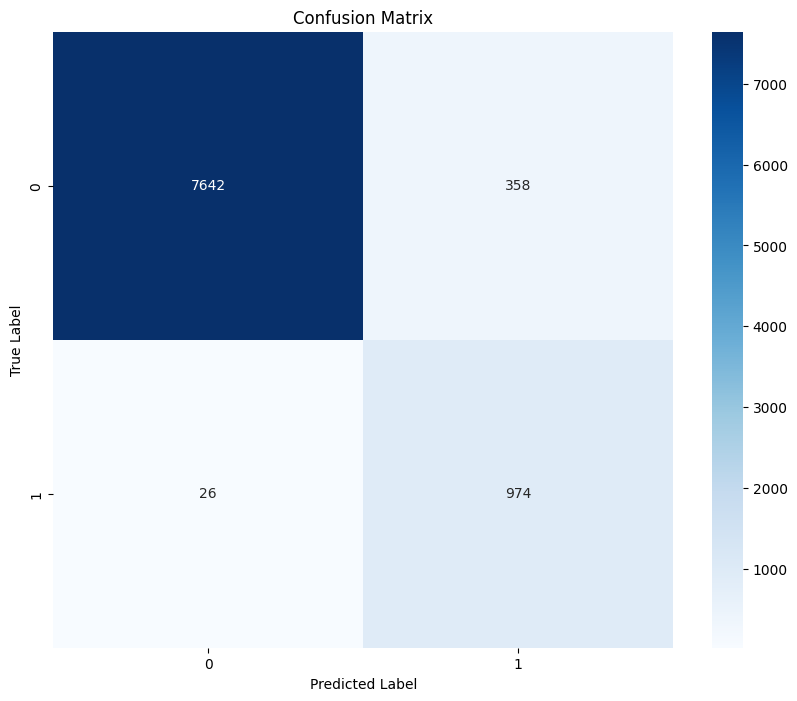

In [19]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(t_test, y_pred_binary)

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Actual labels
actual_damage_lat, actual_damage_lon = [], []
actual_no_damage_lat, actual_no_damage_lon = [], []

# Predicted labels
predicted_damage_lat, predicted_damage_lon = [], []
predicted_no_damage_lat, predicted_no_damage_lon = [], []

for lat, lon, actual_label, predicted_label in zip(lat_test, long_test, y_test, y_pred_binary):
    if actual_label == 'damage':
        actual_damage_lat.append(lat)
        actual_damage_lon.append(lon)
    elif actual_label == 'no_damage':
        actual_no_damage_lat.append(lat)
        actual_no_damage_lon.append(lon)

    if predicted_label == 0: # assuming 1 corresponds to 'damage'
        predicted_damage_lat.append(lat)
        predicted_damage_lon.append(lon)
    elif predicted_label == 1: # assuming 0 corresponds to 'no damage'
        predicted_no_damage_lat.append(lat)
        predicted_no_damage_lon.append(lon)


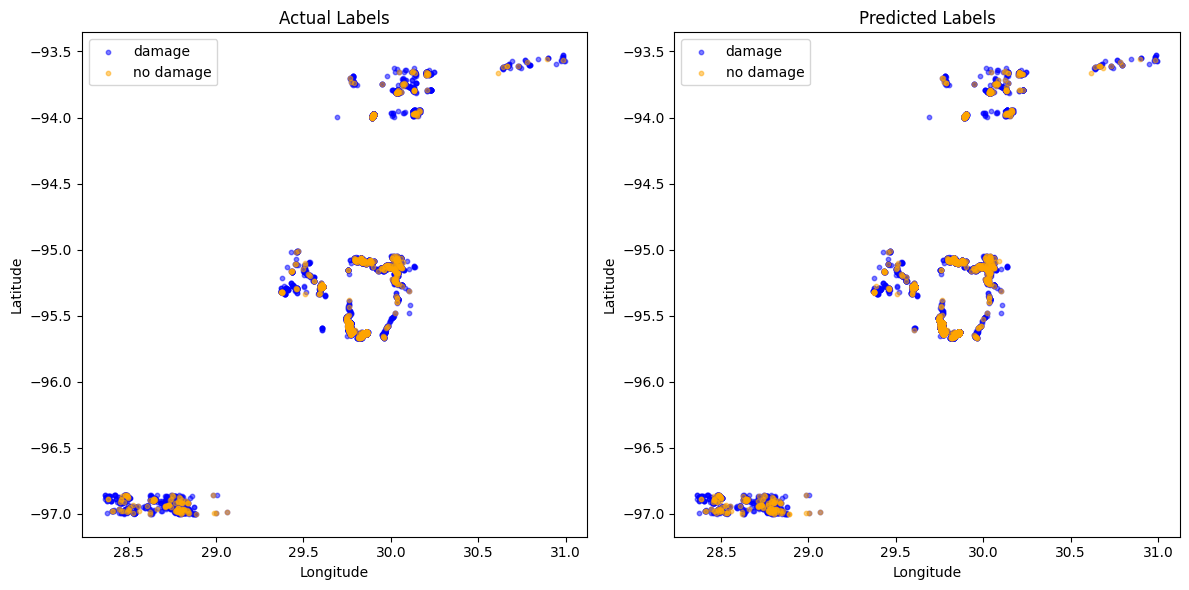

In [21]:
import matplotlib.pyplot as plt

s = 10      # size of points in the scatter plot
alpha = 0.5 # transparency of points

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for actual labels
axes[0].scatter(actual_damage_lon, actual_damage_lat, color='blue', s=s, alpha=alpha, label='damage')
axes[0].scatter(actual_no_damage_lon, actual_no_damage_lat, color='orange', s=s, alpha=alpha, label='no damage')
axes[0].set_title('Actual Labels')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend()

# Plot for predicted labels
axes[1].scatter(predicted_damage_lon, predicted_damage_lat, color='blue', s=s, alpha=alpha, label='damage')
axes[1].scatter(predicted_no_damage_lon, predicted_no_damage_lat, color='orange', s=s, alpha=alpha, label='no damage')
axes[1].set_title('Predicted Labels')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].legend()

plt.tight_layout()
plt.show()


In [22]:
!tar -xvf "/content/drive/MyDrive/ds_301_final_project/test_images_labels_targets.tar"

流式输出内容被截断，只能显示最后 5000 行内容。
test/labels/midwest-flooding_00000210_pre_disaster.json
test/labels/mexico-earthquake_00000080_pre_disaster.json
test/labels/socal-fire_00000558_pre_disaster.json
test/labels/hurricane-matthew_00000297_pre_disaster.json
test/labels/palu-tsunami_00000139_post_disaster.json
test/labels/hurricane-harvey_00000164_pre_disaster.json
test/labels/socal-fire_00000379_post_disaster.json
test/labels/socal-fire_00001222_post_disaster.json
test/labels/socal-fire_00000882_pre_disaster.json
test/labels/hurricane-matthew_00000076_pre_disaster.json
test/labels/socal-fire_00000823_pre_disaster.json
test/labels/hurricane-florence_00000005_pre_disaster.json
test/labels/socal-fire_00000646_post_disaster.json
test/labels/socal-fire_00001220_post_disaster.json
test/labels/hurricane-harvey_00000328_pre_disaster.json
test/labels/socal-fire_00000749_post_disaster.json
test/labels/hurricane-florence_00000253_pre_disaster.json
test/labels/socal-fire_00001240_pre_disaster.json
test/label

In [23]:
datasetPath='/content/test/images'
os.listdir(datasetPath)

['socal-fire_00001246_pre_disaster.png',
 'hurricane-michael_00000428_pre_disaster.png',
 'hurricane-harvey_00000202_pre_disaster.png',
 'socal-fire_00000590_pre_disaster.png',
 'socal-fire_00001240_post_disaster.png',
 'hurricane-matthew_00000010_post_disaster.png',
 'hurricane-michael_00000113_pre_disaster.png',
 'socal-fire_00000659_post_disaster.png',
 'socal-fire_00000449_post_disaster.png',
 'mexico-earthquake_00000190_pre_disaster.png',
 'hurricane-michael_00000022_pre_disaster.png',
 'hurricane-michael_00000218_post_disaster.png',
 'socal-fire_00000967_post_disaster.png',
 'socal-fire_00000049_pre_disaster.png',
 'socal-fire_00000148_post_disaster.png',
 'socal-fire_00000439_pre_disaster.png',
 'socal-fire_00000506_pre_disaster.png',
 'hurricane-florence_00000317_post_disaster.png',
 'mexico-earthquake_00000090_pre_disaster.png',
 'socal-fire_00000234_post_disaster.png',
 'socal-fire_00000173_post_disaster.png',
 'midwest-flooding_00000014_pre_disaster.png',
 'santa-rosa-wildfi

In [24]:
import os
import numpy as np
from PIL import Image

def extract_info_from_filename(file_name):
    # Split the filename and extract the required parts
    parts = file_name.split('_')
    if len(parts) >= 3:
        disaster_type = parts[0]  # e.g., 'hurricane' from 'hurricane-florence_00000186_pre_disaster.png'
        label = '_'.join(parts[-2:])  # e.g., 'pre_disaster' or 'post_disaster'
        return disaster_type, label
    else:
        return None, None

def load_images_real_data(path, x, y):
    imgs = []
    labels = []
    types = []

    for img_file in os.listdir(path):
            if img_file.endswith('.png'):
                # Extract disaster type and label from filename
                disaster_type, label = extract_info_from_filename(img_file)

                # Load the image
                img_path = os.path.join(path, img_file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((x, y))
                imgs.append(np.array(img))

                # Append label and coordinates
                labels.append(label)
                types.append(disaster_type)

                del img

    return np.array(imgs), np.array(labels), np.array(types)


In [25]:
x_real,label_real,type_real =load_images_real_data(datasetPath,224,224)

# x_test, y_test = shuffle(x_test, y_test, random_state=0)

# t_test = pd.Series(y_test,dtype='category')
# print(dict(enumerate(t_test.cat.categories)))
# t_test = t_test.cat.codes

In [28]:
hurricane_indices = [idx for idx, type in enumerate(type_real) if type.startswith('hurricane')]

In [29]:
x_real_hurricane,label_real_hurricane,type_real_hurricane = x_real[hurricane_indices],label_real[hurricane_indices],type_real[hurricane_indices]

In [31]:
y_pred = saved_model_VGG16.predict(x_real_hurricane)

25/25 [==============================] - 2s 64ms/step


In [32]:
y_pred

array([[0.6853428 , 0.31465727],
       [0.14035013, 0.8596499 ],
       [0.80325156, 0.1967485 ],
       ...,
       [0.9678763 , 0.03212371],
       [0.02739406, 0.972606  ],
       [0.03047024, 0.96952975]], dtype=float32)

In [33]:
label_map = {0: 'damage', 1: 'no_damage'}
y_pred_binary = np.argmax(y_pred, axis=1)
mapped_predictions = [label_map[pred] for pred in y_pred_binary]

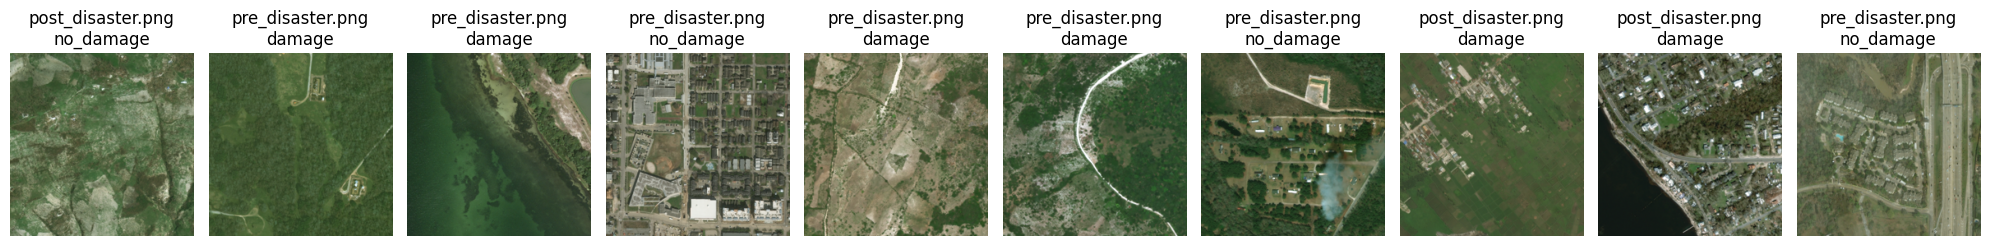

In [34]:
import random
import matplotlib.pyplot as plt

def display_random_samples_real(images, labels, predicted_labels, num_samples=10):
    if num_samples > len(images):
        print("Number of samples requested exceeds the total number of images. Displaying all images instead.")
        num_samples = len(images)

    # Randomly select images and their corresponding labels
    random_indices = random.sample(range(len(images)), num_samples)
    selected_images = [images[i] for i in random_indices]
    selected_labels = [labels[i] for i in random_indices]
    selected_predicted_labels = [predicted_labels[i] for i in random_indices]

    # Set up the subplot grid
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 2, 4))

    if num_samples == 1:  # If only one sample, axes is not a list
        axes = [axes]

    for ax, img, label, pred_label in zip(axes, selected_images, selected_labels, selected_predicted_labels):
        ax.imshow(img)
        ax.set_title(f"{label}\n{pred_label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
display_random_samples_real(x_real_hurricane,label_real_hurricane,mapped_predictions)